<a href="https://colab.research.google.com/github/Suriyabalu/ML-practise-/blob/main/Text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q transformers

In [4]:
!pip install -q youtube_transcript_api

In [5]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [6]:
youtube_video = "https://www.youtube.com/watch?v=aPfkYu_qiF4"

In [7]:
video_id = youtube_video.split("=")[1]

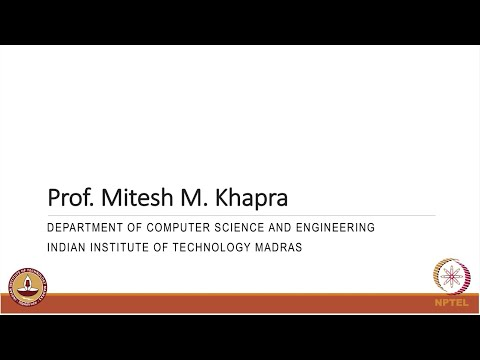

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [9]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [10]:
transcript[0:5]

[{'text': 'Hi everyone so this is introduction to the\ncourse on deep learning which will be offered',
  'start': 14.769,
  'duration': 5.401},
 {'text': 'through NPTEL.', 'start': 20.17, 'duration': 1.06},
 {'text': 'So for over the past few years, past decade\nor so, deep learning has become very prevalent',
  'start': 21.23,
  'duration': 4.939},
 {'text': 'and it has finds applications in a wide range\nof area such as speech, computer vision, natural',
  'start': 26.169,
  'duration': 6.741},
 {'text': 'language processing like most of the state\nof the art systems in these areas from even',
  'start': 32.91,
  'duration': 5.3}]

In [11]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

6841


In [14]:
result

' Hi everyone so this is introduction to the\ncourse on deep learning which will be offered through NPTEL. So for over the past few years, past decade\nor so, deep learning has become very prevalent and it has finds applications in a wide range\nof area such as speech, computer vision, natural language processing like most of the state\nof the art systems in these areas from even companies like Google, Facebook etc., use\ndeep learning as the underlying solution. So in this course we will learn some of the\nfoundational or the fundamental blocks of deep learning, in particular we will start\nright from the basics and start from perceptron or sigmoid neuron, a single neuron and from\nthere we will try to go to multilayered network of neurons, or multilayered perceptron as\nit is commonly known, so and we will look at algorithms for training such networks and\nthe specific algorithm that we look at is back propagation which uses gradient descent. And then we will look at several applicat

In [12]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

In [15]:
len(str(summarized_text))

2631

In [16]:
str(summarized_text)

"[' Deep learning has become very prevalent and finds applications in a wide range of areas such as speech, computer vision, natural language processing . In this course we will learn some of the fundamental blocks of deep learning, in particular we will start right from the basics and start from perceptron or sigmoid neuron, a single neuron and from there we will try to go to multilayered network of neurons .', ' We will move on to the next type of neural network which is recurrent neural networks which find applications in areas where you have to deal with sequence . So sequences are again omnipresent. You have sequences in natural language text. So when you talk of a sentence you can think of it as a sequence of words .', ' We will look at algorithms for training recurrent neural network which is again back propagation, but with a twist to it and that is known as back propagation through time. So we will be looking at that and we will also look at other forms of other types of RNNs.

Method 2

In [17]:
! pip install pytube -q 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.2 MB/s eta 0:00:00


In [18]:
from pytube import YouTube

In [33]:
VIDEO_URL = 'https://www.youtube.com/watch?v=aPfkYu_qiF4'

In [34]:
yt = YouTube(VIDEO_URL,use_oauth=True, allow_oauth_cache=True)

In [35]:
audio = yt.streams.filter(only_audio = True, file_extension = 'mp4') 
audio[0].download(filename="ytaudio.mp4")

Please open https://www.google.com/device and input code KNVD-PGVM
Press enter when you have completed this step.


'/content/ytaudio.mp4'

In [ ]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav

In [39]:
import torch
print(torch.__version__)

2.0.0+cu118


In [40]:
!pip install huggingsound -q 

In [41]:
from huggingsound import SpeechRecognitionModel

In [43]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [44]:
device

'cpu'

In [45]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device)

INFO:huggingsound.speech_recognition.model:Loading model...


**Audio chuncking (silero VAD voice activity detector)**

In [46]:
import librosa

In [47]:
input_file = '/content/ytaudio.wav'

In [48]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000,
    hop_length=16000
)

16000


In [49]:
import soundfile as sf

In [50]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [51]:
i

13

In [52]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/{a}.wav') 

In [53]:
audio_path

['/content/0.wav',
 '/content/1.wav',
 '/content/2.wav',
 '/content/3.wav',
 '/content/4.wav',
 '/content/5.wav',
 '/content/6.wav',
 '/content/7.wav',
 '/content/8.wav',
 '/content/9.wav',
 '/content/10.wav',
 '/content/11.wav',
 '/content/12.wav',
 '/content/13.wav']

In [54]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 14/14 [08:36<00:00, 36.87s/it]


In [55]:
full_transcript = ' '

In [56]:
len(full_transcript)

1

In [57]:
from transformers import pipeline

In [58]:
summarization = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [59]:
summarized_text = summarization(full_transcript)

Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


In [60]:
summarized_text[0]['summary_text']

" CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots for next week's gallery of snapshots of the week's featured destinations . Visit CNN iReport.com/Travel next Friday for a new gallery next week . Submit photos of the best shots of the day to go viral ."

In [61]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

input text 
 Hi everyone so this is introduction to the
course on deep learning which will be offered through NPTEL. So for over the past few years, past decade
or so, deep learning has become very prevalent and it has finds applications in a wide range
of area such as speech, computer vision, natural language processing like most of the state
of the art systems in these areas from even companies like Google, Facebook etc., use
deep learning as the underlying solution. So in this course we will learn some of the
foundational or the fundamental blocks of deep learning, in particular we will start
right from the basics and start from perceptron or sigmoid neuron, a single neuron and from
there we will try to go to multilayered network of neurons, or multilayered perceptron as
it is commonly known, so and we will look at algorithms for training such networks and
the specific algorithm that we look at is back propagation which uses gradient descent. And then we will look at several applica

In [62]:
len(str(summarized_text))

2631